In [ ]:
import pandas as pd
df=pd.read_csv('sales.csv')
df.head()

<u>**Parse date**</u>

In [6]:
df['Date']=pd.to_datetime(df['Date'])
df=df.sort_values('Date')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768
3037,22,2010-01-10,905987.17,0,69.31,2.717,136.629757,8.572
4181,30,2010-01-10,445475.30,0,70.28,2.603,211.329874,8.163
5182,37,2010-01-10,529877.93,0,74.66,2.603,210.440443,8.476
320,3,2010-01-10,358784.10,0,73.60,2.603,214.984655,7.564


<u>**Aggregate weekly sales**</u>

In [ ]:
weekly_sales=df.groupby('Date')['Weekly_Sales'].sum().reset_index()
weekly_sales.head()

<u>**Plot**</u>

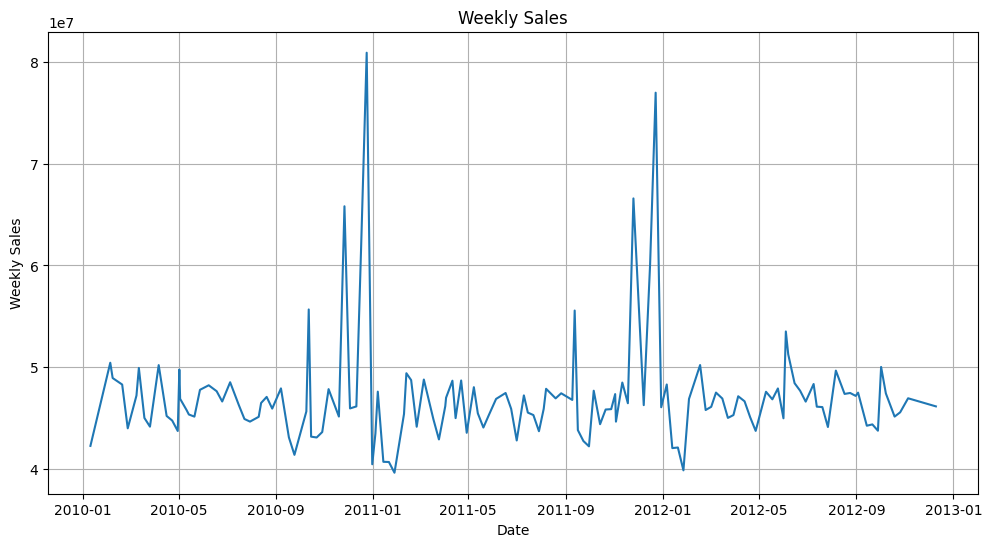

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(weekly_sales['Date'],weekly_sales['Weekly_Sales'])
plt.title("Weekly Sales")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.grid(True)
plt.show()


**<u>Add time index for regression model </u>**

In [15]:
weekly_sales['days_since_start']=(weekly_sales['Date']-weekly_sales['Date'].min()).dt.days
X=weekly_sales[['days_since_start']]
y=weekly_sales['Weekly_Sales']

**<u>Train a simple linear regression model</u>**

In [16]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X,y)

LinearRegression()

**<u>Predict Future Sales for next 30 days</u>**

In [21]:
import numpy as np
future_days=pd.DataFrame({'days_since_start':np.arange(X['days_since_start'].max()+1,X['days_since_start'].max()+31)})
future_predictions=model.predict(future_days)
#Create data frame with predicted values and future dates
future_dates=pd.date_range(start=weekly_sales['Date'].max()+pd.Timedelta(days=1),periods=30)
forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Predicted_weekly_sales':future_predictions
})
forecast_df.head()
forecast_df.to_csv('sales_forecast.csv',index=False)

<u>**Plot for Weekly sales forecast**</u>

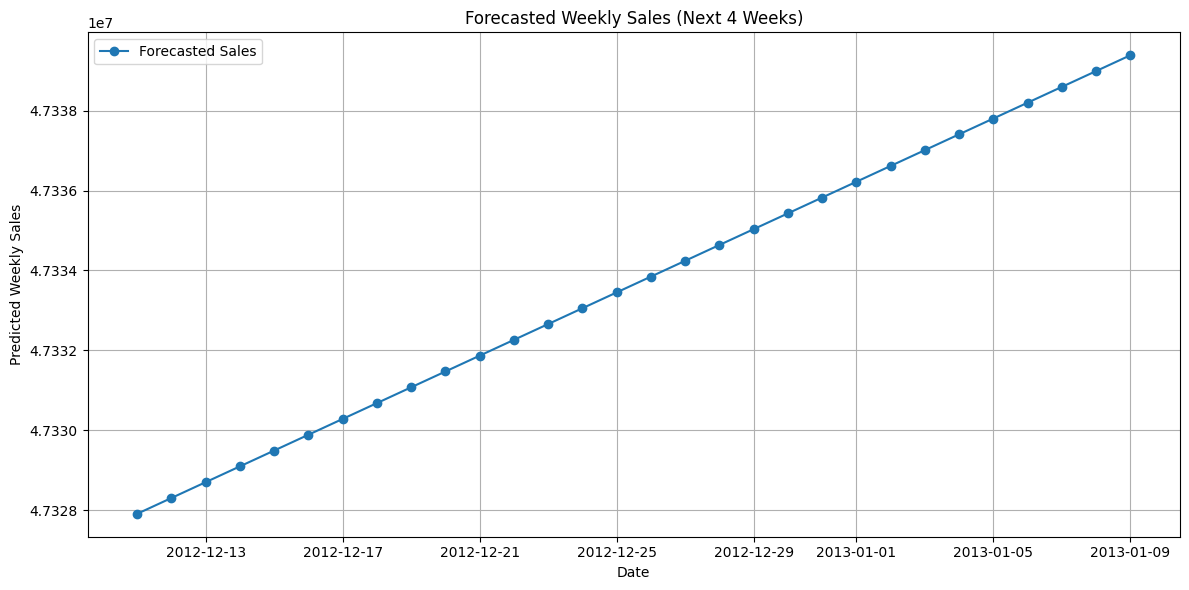

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Date'], forecast_df['Predicted_weekly_sales'], marker='o', label='Forecasted Sales')
plt.title("Forecasted Weekly Sales (Next 4 Weeks)")
plt.xlabel("Date")
plt.ylabel("Predicted Weekly Sales")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [27]:
import joblib
joblib.dump(model,'sales_model.pkl')

['sales_model.pkl']

In [ ]:
weekly_sales.to_csv('weekely_sales_cleaned.c')